## Evaluation for Classification

### Preamble

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes:
# Negative class (0) is 'not digit 1'
# Positive class (1) id 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('Binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
np.bincount(y_binary_imbalanced) # Negative class(0) is the most frequent class 

array([1615,  182], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

## Accuracy of SVM classifier
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

### Dummy Classifier


Dummy classifer that makes predicition using simple rules, which can be useful as a baseline for comparisiion against the actual classifiers, especially with imbalanced class.

Strategy in case of dummy classsifier:
most_frequent
, stratified
, uniform 
, constant

In [18]:
from sklearn.dummy import DummyClassifier
# Negative class(0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
## dummy_majority = DummyClassifier(strategy = 'uniform').fit(X_train, y_train)
## dummy_majority = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
# the most_frequent dummy classifer always predict class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [13]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

If classifier accuracy is close to the null baseline classifier accuracy that could be due to
Ineffective, erenous or missing features
Poor choice of kernel or hyperparameter
Large class imbalance

In [14]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.97777777777777775

Dummy Regressor are counter part to the Dummy classifier
mean: predicts the mean of training targets
median: predicts the median of the training targets
quantile: predicts user provided quantile of the training targets
constant: predicts a constant user-provided value

False Positive: Type 1- error
False Negative: Type 2 - error

### Confusion matrices

#### Binary (two class) confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class(Dummy Classifier):\n', confusion)

Most frequent class(Dummy Classifier):
 [[407   0]
 [ 43   0]]


In [23]:
dummy_classprop = DummyClassifier(strategy = "stratified").fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion_prop = confusion_matrix(y_test, y_classprop_predicted)

print('Random class propotional predicition (dummy classifier):\n', confusion_prop)

Random class propotional predicition (dummy classifier):
 [[369  38]
 [ 36   7]]


In [25]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion_svm = confusion_matrix(y_test, svm_predicted)

print('SVM classifier (kernel = linear, C  = 1):\n', confusion_svm)

SVM classifier (kernel = linear, C  = 1):
 [[402   5]
 [  5  38]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dt_predicted = tree.predict(X_test)
confusion_dt = confusion_matrix(y_test, dt_predicted)

print('Decision tree classifier (max_depth = 2):\n', confusion_dt)

Decision tree classifier (max_depth = 2):
 [[400   7]
 [ 17  26]]


In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion_lr = confusion_matrix(y_test, lr_predicted) 

print('Logsitic Regression (default settings):\n', confusion_lr)

Logsitic Regression (default settings):
 [[401   6]
 [  6  37]]


### Evaluation metrics for binary classification

In [35]:
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, dt_predicted)))

print('Precision: {:.2f}'.format(precision_score(y_test, dt_predicted)))

print('Recall: {:.2f}'.format(recall_score(y_test, dt_predicted)))

print('F1: {:.2f}'.format(f1_score(y_test, dt_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [37]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [38]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, dt_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.91      0.91      0.91       407
          1       0.16      0.16      0.16        43

avg / total       0.84      0.84      0.84       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision Function

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0 )
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# Decision_function scores for first 20 instances
y_score_list

[(0, -23.177190659057413),
 (0, -13.541499275924934),
 (0, -21.722931392118863),
 (0, -18.907331592939087),
 (0, -19.735710477993003),
 (0, -9.7498819515005231),
 (1, 5.2349349015862634),
 (0, -19.307654905146972),
 (0, -25.101179084160105),
 (0, -21.827293939603223),
 (0, -24.151385315482127),
 (0, -19.576970456775371),
 (0, -22.574536340741492),
 (0, -10.823178014466372),
 (0, -11.911995992793109),
 (0, -10.979093931056003),
 (1, 11.206094761125225),
 (0, -27.64601060941326),
 (0, -12.859207350646066),
 (0, -25.848766509204186)]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.595556329003577e-11),
 (0, 1.3152279108008344e-06),
 (0, 3.6800249698884413e-10),
 (0, 6.1468160841157513e-09),
 (0, 2.6846633981073727e-09),
 (0, 5.8298146862571315e-05),
 (1, 0.99470105711333801),
 (0, 4.1190021098614671e-09),
 (0, 1.2551523237968057e-11),
 (0, 3.315329415875665e-10),
 (0, 3.24479024110104e-11),
 (0, 3.1465146408233984e-09),
 (0, 1.570375227232466e-10),
 (0, 1.9931723568128993e-05),
 (0, 6.7093887788889749e-06),
 (0, 1.7054252267886335e-05),
 (1, 0.99998640907615222),
 (0, 9.8512228975011833e-13),
 (0, 2.6020526264294253e-06),
 (0, 5.9432409955205328e-12)]

## Precision recall curves

Top right corner 
Ideal point 
precision =- 1.0, recall = 1.o

Stepness of P-R curve
Maximize Precision while maximizing recall

<IPython.core.display.Javascript object>


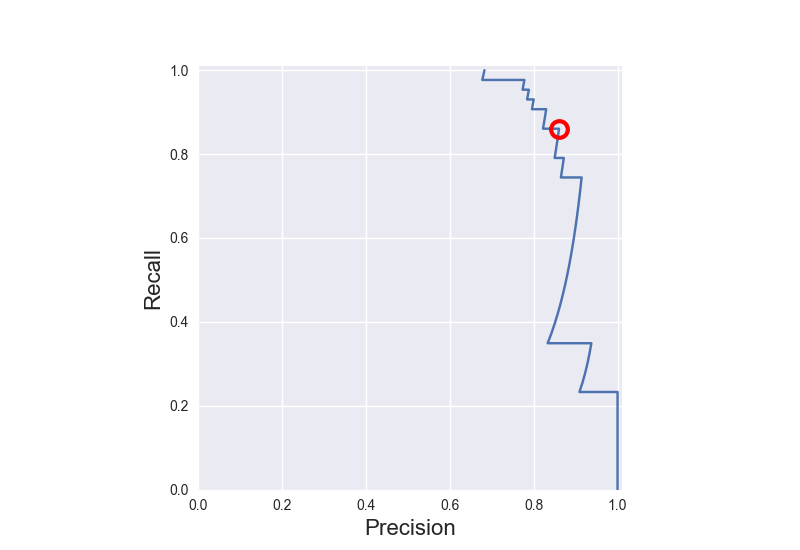

In [42]:
from sklearn.metrics import precision_recall_curve
precision, recall,threshold = precision_recall_curve(y_test, y_scores_lr)

closest_zero = np.argmin(np.abs(threshold))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Specificity : False positive rate

predict positive and predict negative are found in the sctter plot for the breast cancer datasets

Recall oriented machine learning tasks 
Search and information extraction in legal discovery, tumor detectio, often paired with a human expert

Precision priented machine learning task
Search engine ranking
Document classification


### ROC curves , Area-Under-Curve (AUC)


<IPython.core.display.Javascript object>


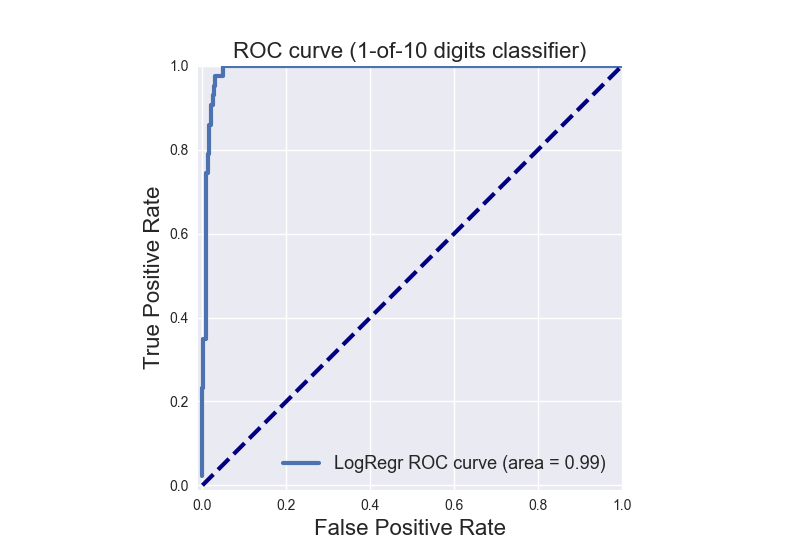

In [44]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr_lr, tpr_lr, lw = 3, label = 'LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


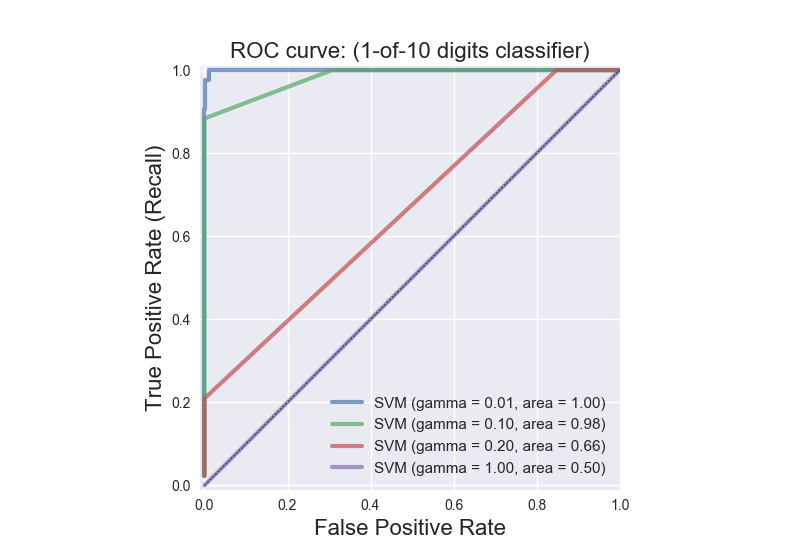

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [49]:
from matplotlib import cm 
## Multilabel : Each instance has multiple labels being declared

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

#### Multi class confusion matrix

<IPython.core.display.Javascript object>


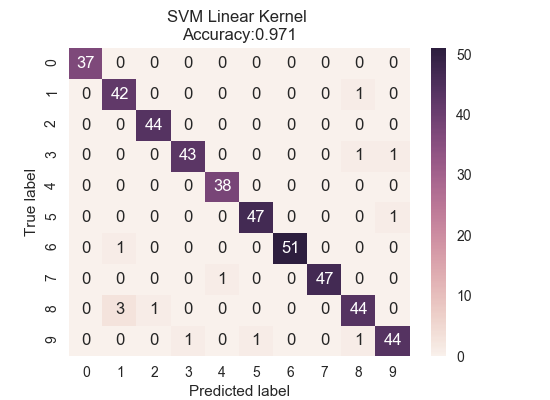

<IPython.core.display.Javascript object>


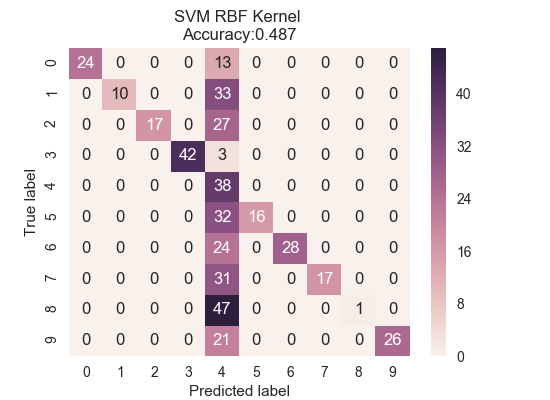

In [52]:

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state = 0)

svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');
